In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score


In [14]:
df = pd.read_csv("Dry_Bean_Dataset.csv")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [15]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [16]:
features_df = df.columns[:-1]
features_df

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

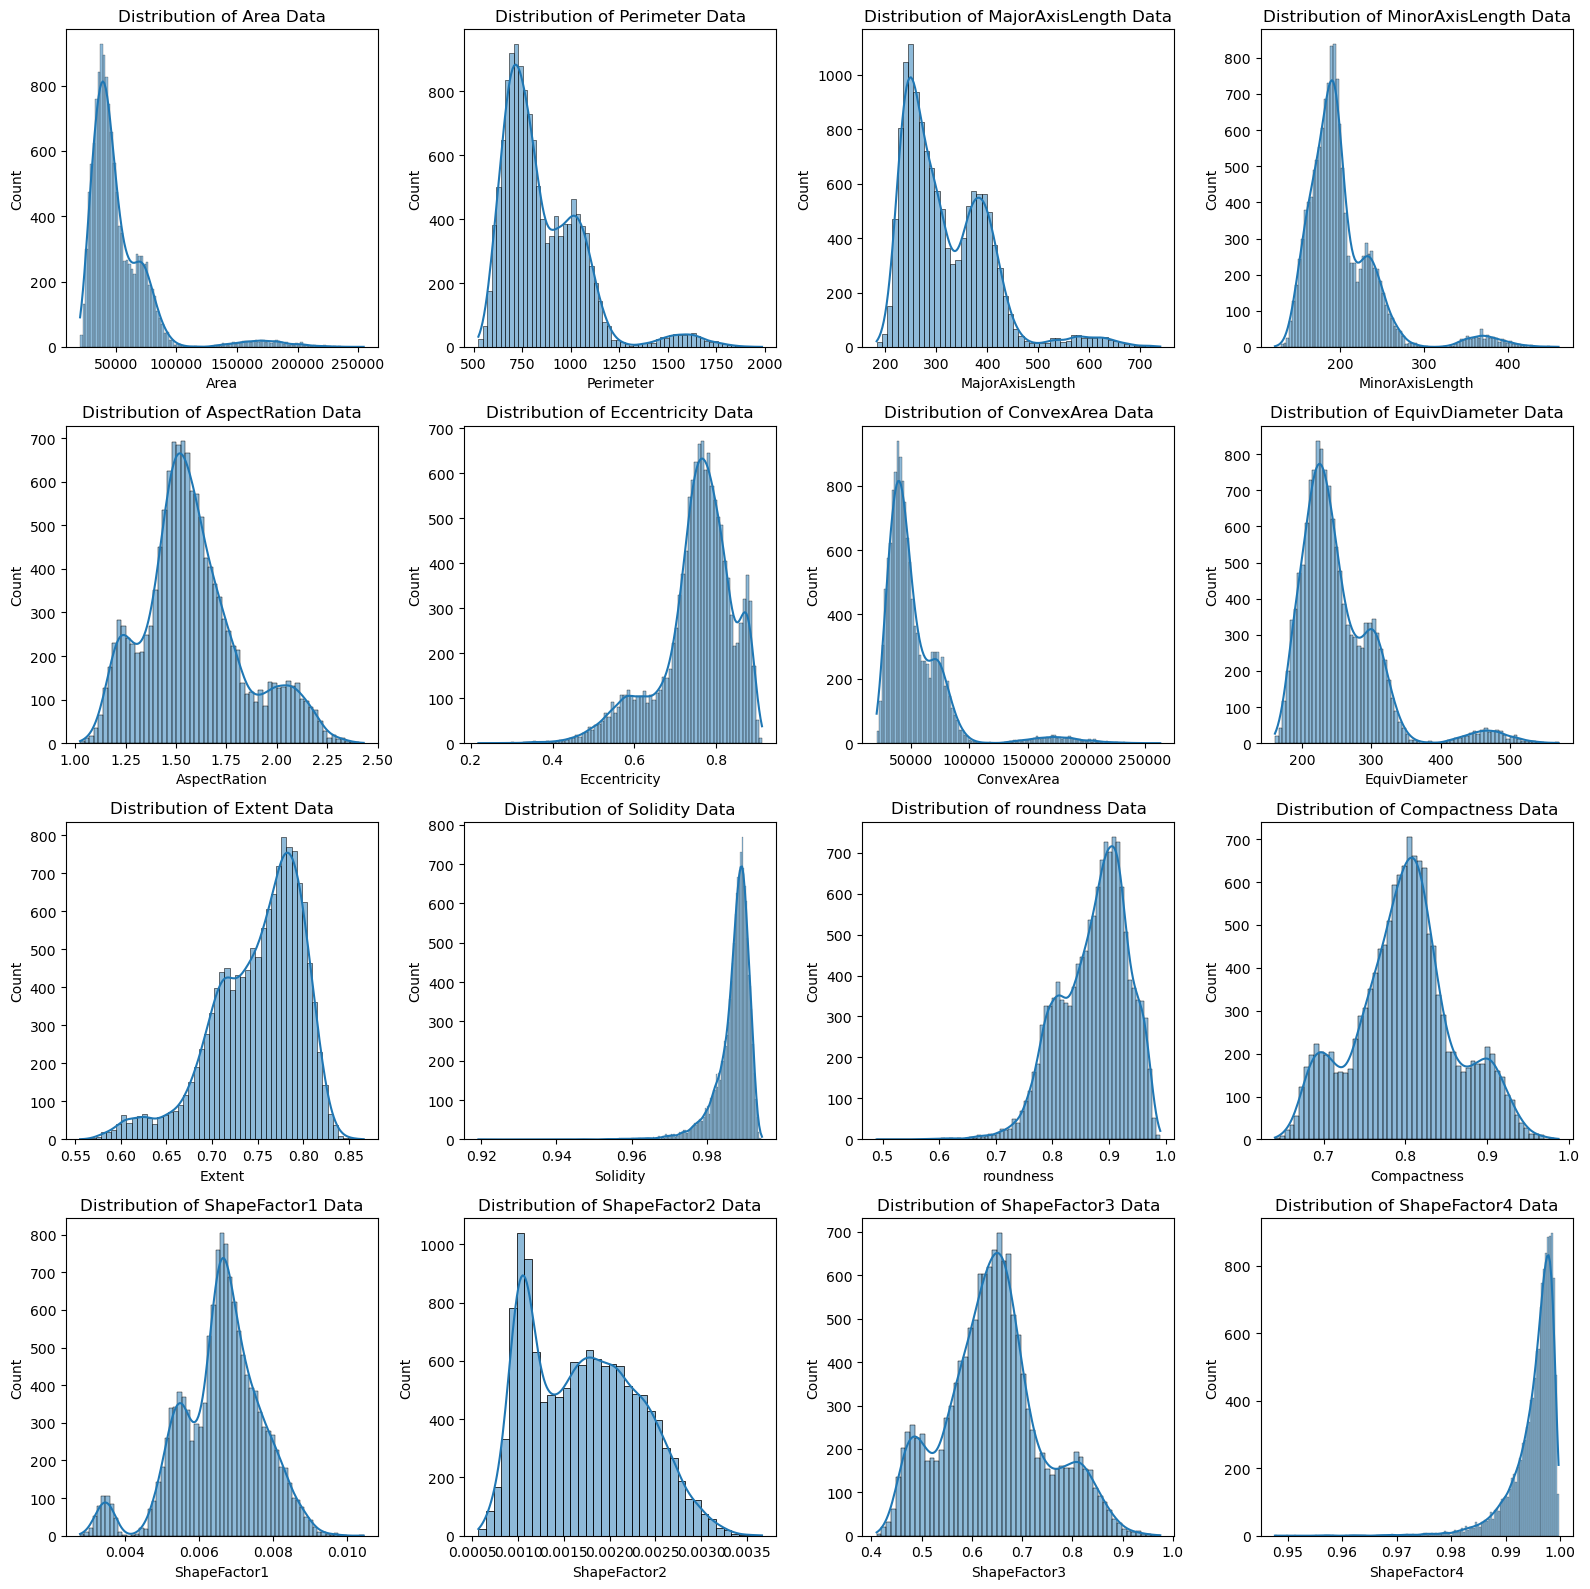

In [17]:
plt.figure(figsize = (16, 16))
for i, col in enumerate(features_df, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

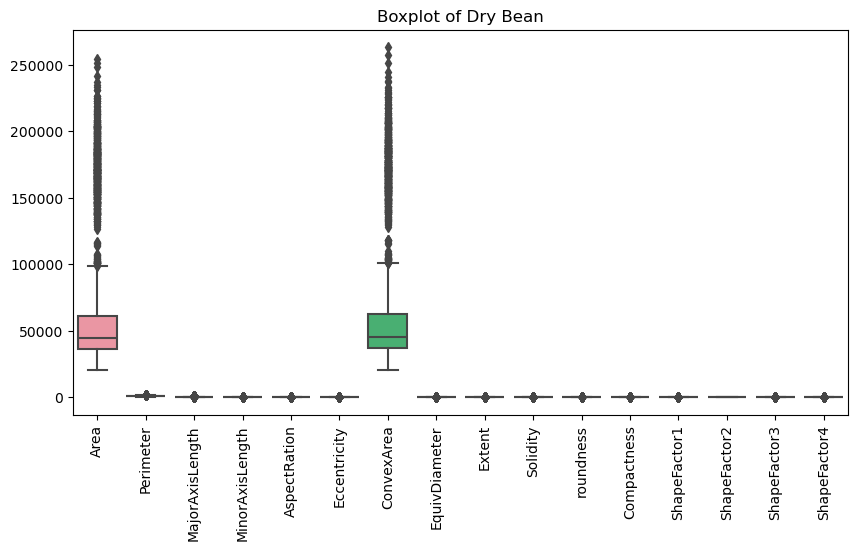

In [18]:
# Check outlier of Dry Bean features
plt.figure(figsize = (10, 5))
sns.boxplot(df[features_df])
plt.title("Boxplot of Dry Bean")
plt.xticks(rotation = 90)
plt.show()

In [23]:
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))]

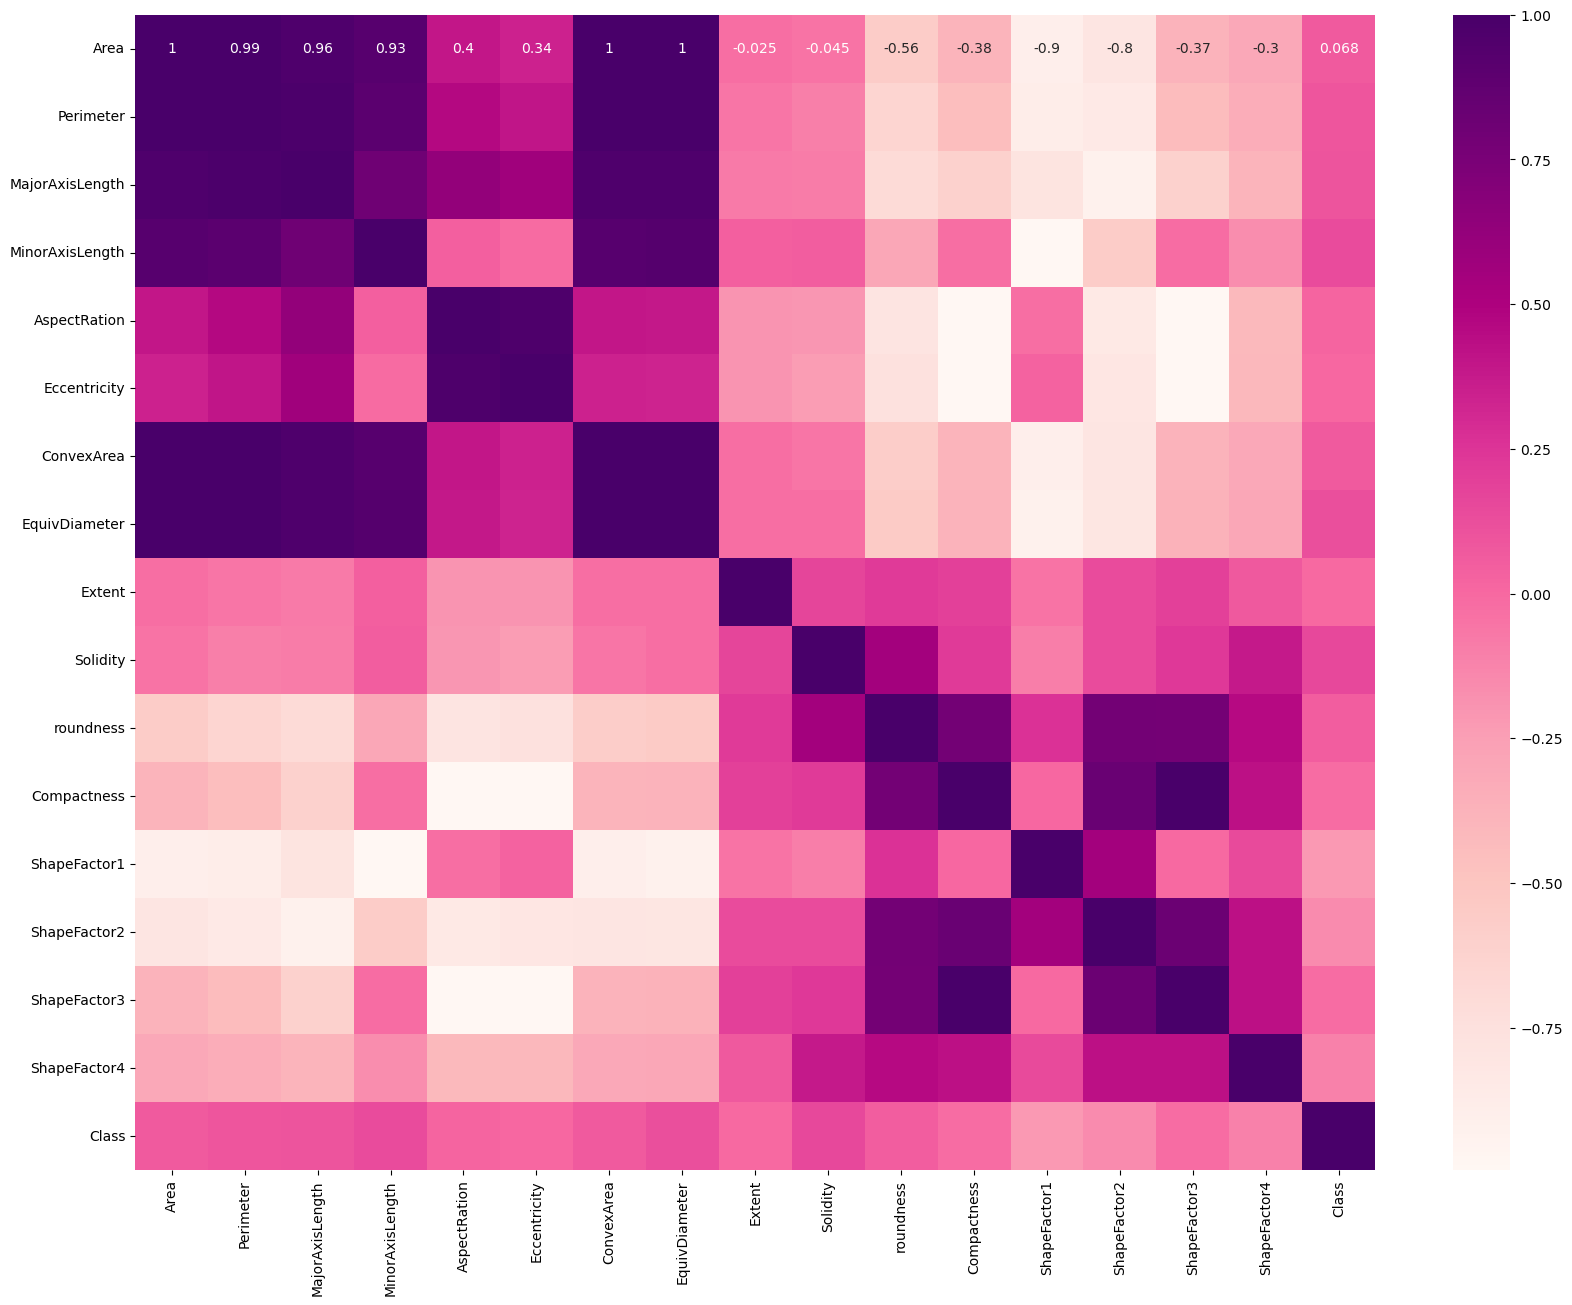

In [27]:
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])

relations = df.corr()
plt.figure(figsize =(20,15))
sns.heatmap(relations, cmap = 'RdPu', annot = True)
plt.show()

In [39]:
X, y= df.iloc[:,:-1], df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [40]:
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train_scaled, y_train)

y_predictions = logistic_regression.predict(X_test_scaled)
  
accuracy = accuracy_score(y_test,y_predictions)
  
print(classification_report(y_test,y_predictions))

print(f"The Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        62
           1       0.93      0.83      0.88        69
           2       0.91      0.93      0.92       651
           3       0.90      0.77      0.83        48
           4       0.90      0.93      0.91       177
           5       0.88      0.87      0.87       471

    accuracy                           0.90      1478
   macro avg       0.89      0.87      0.88      1478
weighted avg       0.90      0.90      0.90      1478

The Accuracy: 0.8971583220568335


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
c_params = [0.01,0.1,1,10,100]

for c in c_params:
  print("------------------------------------------------")
  print(f"C param: {c}")
  lr = LogisticRegression(C=c, penalty='l1', solver='liblinear')
  lr.fit(X_train_scaled,y_train)
  y_pred = lr.predict(X_test_scaled)
  accuracy = accuracy_score(y_test,y_pred)
  
  print(classification_report(y_test,y_pred))
  print(f"The Accuracy: {accuracy}")
  print("------------------------------------------------")

------------------------------------------------
C param: 0.01


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.88      0.60      0.71        62
           1       0.82      0.20      0.33        69
           2       0.89      0.94      0.91       651
           3       0.00      0.00      0.00        48
           4       0.93      0.86      0.89       177
           5       0.72      0.86      0.78       471

    accuracy                           0.82      1478
   macro avg       0.71      0.58      0.60      1478
weighted avg       0.80      0.82      0.80      1478

The Accuracy: 0.8247631935047361
------------------------------------------------
------------------------------------------------
C param: 0.1
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        62
           1       0.95      0.78      0.86        69
           2       0.91      0.91      0.91       651
           3       0.94      0.60      0.73        48
           4       0.92      0.90      0.9

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        62
           1       0.92      0.83      0.87        69
           2       0.91      0.91      0.91       651
           3       0.80      0.77      0.79        48
           4       0.91      0.90      0.91       177
           5       0.86      0.87      0.86       471

    accuracy                           0.89      1478
   macro avg       0.87      0.86      0.87      1478
weighted avg       0.89      0.89      0.89      1478

The Accuracy: 0.8890392422192152
------------------------------------------------
------------------------------------------------
C param: 100
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        62
           1       0.92      0.83      0.87        69
           2       0.91      0.92      0.91       651
           3       0.81      0.81      0.81        48
           4       0.91      0.90      0.9

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
